In [3]:
import pandas as pd
import sys
%matplotlib inline
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
import talib

Python version 2.7.13 |Anaconda custom (64-bit)| (default, May 11 2017, 13:17:26) [MSC v.1500 64 bit (AMD64)]
Pandas version 0.18.1


**Write a Python Program to**
- Download data for Dow Jones Index (DJIA) for the last 15 years.
- Compute daily percentage deviations of mid- price of DJIA from the 200 DAY Exponential Moving average (200DEMA) of close prices.
- Prices above the 200-DEMA would get a positive value while those below would get a negative value
- Whenever price is above 200-DEMA the market is generally considered to be in an up-move (and vice versa). Graphically represent the historical deviations and mark out clear periods of overall bullish and bearish regimes in DJIA.
- For each of these regimes, clearly fit separate linear trend-lines and plot it on the same graph.
- From the difference in relative slopes of the different trend lines, make a note about the relative shock during market regime shifts (e.g. – if a long bull market gave way to a sudden correction, the angle between the trend-lines of the two regimes would be high and would correspond to a violent regime-shift)
- Using the trend-line of the last-but-one regime, forecast the generic direction of price pattern for the last-regime. Did the projected and actual regimes match?

In [4]:
import pandas as pd
from pandas_datareader import data, wb
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

####

## 1. Download 15 yrs DJIA
start = datetime.datetime(2002, 6, 1)
end = datetime.datetime(2017, 6, 1)

data = data.DataReader('DIA',  'google', start, end)
#data = data['Close']
#returns = np.log(data / data.shift(1))

###
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2002-06-03,99.28,100.11,96.91,96.95,5588900
2002-06-04,96.98,97.70,96.11,97.11,5579900
2002-06-05,97.28,98.30,97.10,98.23,3744400
2002-06-06,98.12,98.20,96.15,96.53,4836400
2002-06-07,95.32,96.65,94.87,96.22,5885900


In [5]:
data = data.iloc[:, :-1] #Remove Volume
data['mid'] = data.sum(axis=1) #get midpoint
data.head()

,Open,High,Low,Close,mid
Date,,,,,
2002-06-03,99.28,100.11,96.91,96.95,393.25
2002-06-04,96.98,97.70,96.11,97.11,387.90
2002-06-05,97.28,98.30,97.10,98.23,390.91
2002-06-06,98.12,98.20,96.15,96.53,389.00
2002-06-07,95.32,96.65,94.87,96.22,383.06


In [6]:
data['midp'] = data['mid'] / 4
data.head()

,Open,High,Low,Close,mid,midp
Date,,,,,,
2002-06-03,99.28,100.11,96.91,96.95,393.25,98.3125
2002-06-04,96.98,97.70,96.11,97.11,387.90,96.9750
2002-06-05,97.28,98.30,97.10,98.23,390.91,97.7275
2002-06-06,98.12,98.20,96.15,96.53,389.00,97.2500
2002-06-07,95.32,96.65,94.87,96.22,383.06,95.7650


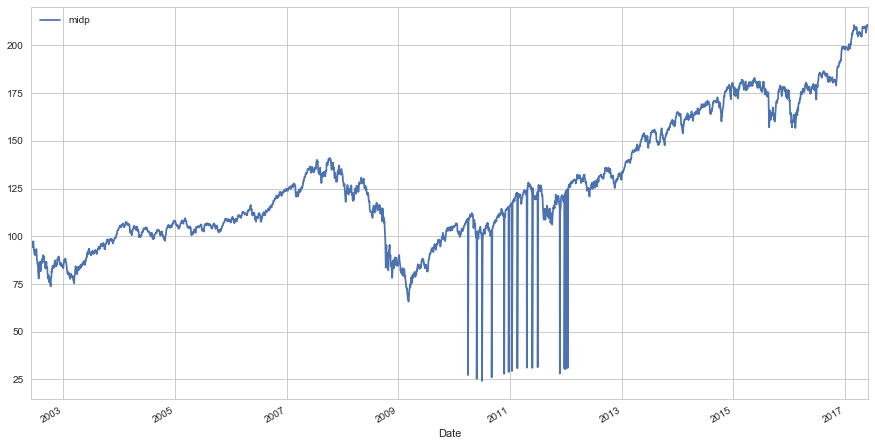

In [7]:
data = data['midp']
data.plot(legend=True,figsize=(15,8))

In [8]:
#2. Compute daily percentage deviations of mid- price of DJIA from the 
##200 DAY Exponential Moving average (200DEMA) of close prices
data = pd.DataFrame(data)
data['SMA'] = data.rolling(200).mean()

data = data.dropna()
data.head()

,midp,SMA
Date,,
2003-03-18,82.0925,84.757100
2003-03-19,82.5175,84.678125
2003-03-20,82.6900,84.606700
2003-03-21,84.3775,84.539950
2003-03-24,82.9375,84.468388


Compute daily percentage deviations of mid- price of DJIA from the 200 DAY Exponential Moving average (200DEMA) of close prices.

In [9]:
data['devs'] = (data['midp'] - data['SMA']) / data['SMA'] * 100
data.tail()

,midp,SMA,devs
Date,,,
2017-05-25,210.5800,196.045012,7.414107
2017-05-26,210.5300,196.171237,7.319504
2017-05-30,210.2275,196.292150,7.099291
2017-05-31,210.0350,196.412562,6.935624
2017-06-01,210.7450,196.533625,7.231015


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C4C74A8>], dtype=object)

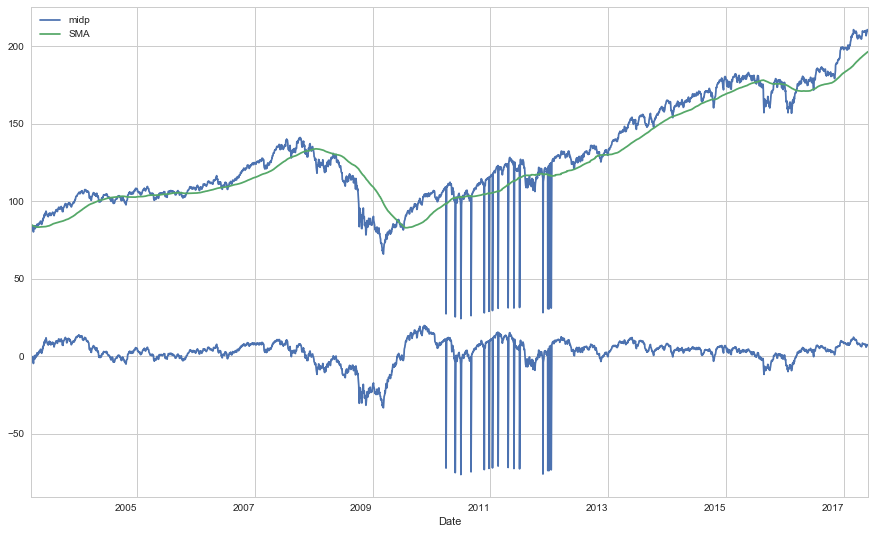

In [10]:
#data.plot(legend=True,figsize=(15,8))
data[['midp','SMA']].plot(figsize=(15,10))
data['devs'].plot(subplots=True,figsize=(15,10))

For each of these regimes, clearly fit separate linear trend-lines and plot it on the same graph.
From the difference in relative slopes of the different trend lines, make a note about the relative shock during market regime shifts (e.g. – if a long bull market gave way to a sudden correction, the angle between the trend-lines of the two regimes would be high and would correspond to a violent regime-shift)
Using the trend-line of the last-but-one regime, forecast the generic direction of price pattern for the last-regime. Did the projected and actual regimes match?

In [11]:
fit = data.polyfit(x, y, 1)
 
slopes[DJIA.index.get_loc(index)-DJIA['down'].count()] =fit[0]
            if(fit[0]>0): clr='y'
            else:         clr='b'
            plt.plot(DJIA.index.get_loc(index)-DJIA['down'].count()+x, fit[0] * x + fit[1], color=clr, linewidth=3)

AttributeError: 'DataFrame' object has no attribute 'polyfit'